<a href="https://colab.research.google.com/github/ajit-ai/Python/blob/main/numpy/numpy_exercise/10_Random_sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Sampling

Random sampling is a statistical technique used to select a subset of data from a larger population in a way that ensures each element has a defined probability of being chosen, enabling unbiased representation. In Python, random sampling is implemented using libraries like random, numpy, pandas, and sklearn, with various types suited for different scenarios.**bold text**

In [27]:
import numpy as np

In [28]:
np.__version__

'2.0.2'

In [29]:
__author__ = 'kyubyong. longinglove@nate.com'

## Simple random data

Q1. Create an array of shape (3, 2) and populate it with random samples from a uniform distribution over [0, 1).

In [30]:
# prompt: Create an array of shape (3, 2) and populate it with random samples from a uniform distribution over [0, 1).

np.random.rand(3, 2)

array([[0.09739339, 0.4050208 ],
       [0.5929184 , 0.5794149 ],
       [0.66262128, 0.09526151]])

Q2. Create an array of shape (1000, 1000) and populate it with random samples from a standard normal distribution. And verify that the mean and standard deviation is close enough to 0 and 1 repectively.

In [31]:
# prompt: Create an array of shape (1000, 1000) and populate it with random samples from a standard normal distribution. And verify that the mean and standard deviation is close enough to 0 and 1 repectively

arr = np.random.randn(1000, 1000)
print('mean: ', arr.mean())
print('std: ', arr.std())

mean:  0.0006598984218994883
std:  1.0009610337691304




```
# This is formatted as code
```

Q3. Create an array of shape (3, 2) and populate it with random integers ranging from 0 to 3 (inclusive) from a discrete uniform distribution.

In [32]:
# prompt: Create an array of shape (3, 2) and populate it with random integers ranging from 0 to 3 (inclusive) from a discrete uniform distribution.

np.random.randint(0, 4, size=(3, 2))


array([[3, 2],
       [1, 2],
       [0, 3]])

Q4. Extract 1 elements from x randomly such that each of them would be associated with probabilities .3, .5, .2. Then print the result 10 times.

In [33]:
x = [b'3 out of 10', b'5 out of 10', b'2 out of 10']


Q5. Extract 3 different integers from 0 to 9 randomly with the same probabilities.

In [34]:
# prompt: Extract 3 different integers from 0 to 9 randomly with the same probabilities.

np.random.choice(10, size=3, replace=False)

array([7, 2, 5])

## Permutations

Q6. Shuffle numbers between 0 and 9 (inclusive).

In [35]:
# prompt: Shuffle numbers between 0 and 9 (inclusive).

np.random.shuffle(np.arange(10))

In [36]:
# Or


## Random generator

Q7. Assign number 10 to the seed of the random generator so that you can get the same value next time.

In [37]:
# prompt:  Assign number 10 to the seed of the random generator so that you can get the same value next time.

np.random.seed(10)

Simple Random Sampling (SRS)
Definition: Each element in the population has an equal probability of being selected, with or without replacement.
Use Case: General-purpose sampling for surveys, data exploration, or creating training/test datasets.

In [38]:
import random
population = list(range(100))
sample = random.sample(population, k=10)  # Without replacement
sample_with_replacement = random.choices(population, k=10)  # With replacement

print(sample)
print(sample_with_replacement)

[10, 91, 75, 0, 83, 6, 62, 90, 56, 36]
[76, 9, 66, 65, 23, 77, 42, 90, 67, 92]


In [39]:
import numpy as np
np.random.seed(42)  # For reproducibility
population = np.arange(100)
sample = np.random.choice(population, size=10, replace=False)  # Without replacement
sample_with_replacement = np.random.choice(population, size=10, replace=True)

print(sample)
print(sample_with_replacement)

[83 53 70 45 44 39 22 80 10  0]
[80  7 34 34 32  4 40 27  6 72]


In [40]:
import pandas as pd
df = pd.DataFrame({'data': range(100)})
sample = df.sample(n=10, random_state=42)  # Without replacement
sample_with_replacement = df.sample(n=10, replace=True, random_state=42)

print(sample)
print(sample_with_replacement)

    data
83    83
53    53
70    70
45    45
44    44
39    39
22    22
80    80
10    10
0      0
    data
51    51
92    92
14    14
71    71
60    60
20    20
82    82
86    86
74    74
74    74


Stratified Sampling
Definition: The population is divided into subgroups (strata) based on a characteristic (e.g., gender, age), and random samples are drawn from each stratum proportionally or equally.
Use Case: Ensures representation of all subgroups, common in machine learning for balanced datasets.

In [41]:
import pandas as pd
df = pd.DataFrame({
    'value': range(100),
    'stratum': ['A']*40 + ['B']*30 + ['C']*30
})
stratified_sample = df.groupby('stratum').sample(frac=0.1, random_state=42)

print(stratified_sample)

    value stratum
19     19       A
16     16       A
15     15       A
26     26       A
65     65       B
55     55       B
44     44       B
99     99       C
89     89       C
72     72       C


In [42]:
from sklearn.model_selection import train_test_split
X, y = df[['value']], df['stratum']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(X_train)
print(y_train)
print(X_test)
print(y_test)

    value
33     33
61     61
51     51
83     83
54     54
..    ...
4       4
65     65
85     85
44     44
27     27

[80 rows x 1 columns]
33    A
61    B
51    B
83    C
54    B
     ..
4     A
65    B
85    C
44    B
27    A
Name: stratum, Length: 80, dtype: object
    value
46     46
79     79
43     43
81     81
14     14
38     38
7       7
95     95
18     18
22     22
28     28
87     87
20     20
64     64
10     10
48     48
71     71
53     53
73     73
57     57
46    B
79    C
43    B
81    C
14    A
38    A
7     A
95    C
18    A
22    A
28    A
87    C
20    A
64    B
10    A
48    B
71    C
53    B
73    C
57    B
Name: stratum, dtype: object


Systematic Sampling
Definition: Select every k-th element from a population after a random starting point, where k = population size / sample size.
Use Case: Useful for ordered datasets or when simple random sampling is computationally expensive.

In [43]:
import numpy as np
population = np.arange(100)
sample_size = 10
k = len(population) // sample_size
start = np.random.randint(0, k)
systematic_sample = population[start::k][:sample_size]

print(systematic_sample)

[ 7 17 27 37 47 57 67 77 87 97]


In [44]:
import pandas as pd
df = pd.DataFrame({'data': range(100)})
k = len(df) // 10
start = np.random.randint(0, k)
systematic_sample = df.iloc[start::k].head(10)

print(systematic_sample)

    data
1      1
11    11
21    21
31    31
41    41
51    51
61    61
71    71
81    81
91    91


Cluster Sampling
Definition: The population is divided into clusters (e.g., geographic regions), and a random subset of clusters is selected, including all elements within chosen clusters.
Use Case: Efficient for geographically dispersed data or when sampling entire groups is practical.

In [45]:
import pandas as pd
import random
df = pd.DataFrame({
    'value': range(100),
    'cluster': [i // 20 for i in range(100)]  # 5 clusters
})
clusters = df['cluster'].unique()
selected_clusters = random.sample(list(clusters), k=2)  # Select 2 clusters
cluster_sample = df[df['cluster'].isin(selected_clusters)]

print(clusters)
print(selected_clusters)
print(cluster_sample)

[0 1 2 3 4]
[np.int64(1), np.int64(0)]
    value  cluster
0       0        0
1       1        0
2       2        0
3       3        0
4       4        0
5       5        0
6       6        0
7       7        0
8       8        0
9       9        0
10     10        0
11     11        0
12     12        0
13     13        0
14     14        0
15     15        0
16     16        0
17     17        0
18     18        0
19     19        0
20     20        1
21     21        1
22     22        1
23     23        1
24     24        1
25     25        1
26     26        1
27     27        1
28     28        1
29     29        1
30     30        1
31     31        1
32     32        1
33     33        1
34     34        1
35     35        1
36     36        1
37     37        1
38     38        1
39     39        1


Bootstrap Sampling
Definition: Sampling with replacement to create multiple datasets of the same size as the original, used to estimate variability or build confidence intervals.
Use Case: Statistical inference, machine learning (e.g., bagging in random forests).

In [46]:
import pandas as pd
df = pd.DataFrame({'data': range(100)})
bootstrap_sample = df.sample(n=len(df), replace=True, random_state=42)

print(bootstrap_sample)

    data
51    51
92    92
14    14
71    71
60    60
..   ...
84    84
79    79
81    81
52    52
23    23

[100 rows x 1 columns]


In [47]:
import pandas as pd
df = pd.DataFrame({'data': range(100)})
bootstrap_sample = df.sample(n=len(df), replace=True, random_state=42)

print(bootstrap_sample)

    data
51    51
92    92
14    14
71    71
60    60
..   ...
84    84
79    79
81    81
52    52
23    23

[100 rows x 1 columns]


Weighted Random Sampling
Definition: Elements are selected with probabilities proportional to assigned weights, with or without replacement.
Use Case: When certain elements are more important (e.g., oversampling rare classes in imbalanced datasets).

In [48]:
import random
population = ['A', 'B', 'C']
weights = [0.5, 0.3, 0.2]
weighted_sample = random.choices(population, weights=weights, k=10)

print(weighted_sample)

['A', 'A', 'A', 'A', 'A', 'A', 'C', 'A', 'A', 'C']


In [49]:
import numpy as np
population = np.array(['A', 'B', 'C'])
weights = [0.5, 0.3, 0.2]
weighted_sample = np.random.choice(population, size=10, p=weights, replace=True)

print(weighted_sample)

['A' 'A' 'B' 'B' 'B' 'A' 'B' 'A' 'C' 'C']


**Reservoir Sampling**
**Definition:** Selects k items from a stream of unknown size, ensuring each item has an equal probability of being chosen, ideal for streaming data.
**Use Case:** Big data or real-time data processing where the full dataset isn’t loaded into memory.

In [50]:
import random
def reservoir_sampling(stream, k):
    reservoir = []
    for i, item in enumerate(stream):
        if i < k:
            reservoir.append(item)
        else:
            if random.random() < k / (i + 1):
                reservoir[random.randint(0, k-1)] = item
    return reservoir
stream = range(100)
sample = reservoir_sampling(stream, 10)

print(sample)

[41, 1, 55, 57, 69, 80, 35, 47, 59, 62]


**Latin Hypercube Sampling (LHS)**
**Definition:** Divides each dimension of the population into equally spaced intervals and samples randomly within each interval, ensuring even coverage in multi-dimensional spaces.
**Use Case:** Monte Carlo simulations, uncertainty analysis, and optimization.

In [51]:
from scipy.stats import qmc
sampler = qmc.LatinHypercube(d=2)  # 2 dimensions
sample = sampler.random(n=10)  # 10 samples

print(sampler)
print(sample)

[[0.12544427 0.43465123]
 [0.0952338  0.15973933]
 [0.67477913 0.3672472 ]
 [0.35149293 0.99133564]
 [0.75422381 0.81640597]
 [0.81667753 0.56127203]
 [0.5736344  0.24645976]
 [0.47904414 0.72454301]
 [0.20342983 0.66004172]
 [0.93540027 0.0326102 ]]


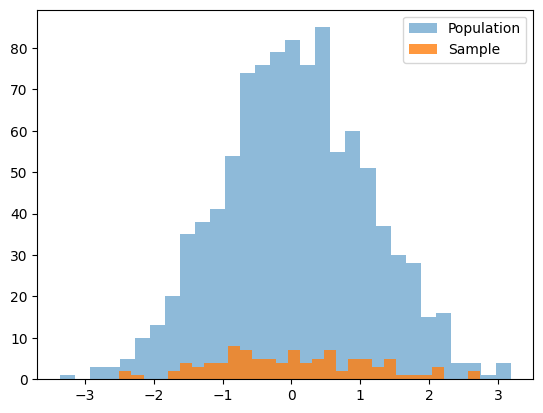

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a sample dataset
df = pd.DataFrame({'value': np.random.normal(0, 1, 1000)})  # Normal distribution
sample = df.sample(n=100, random_state=42)  # Simple random sample

# Visualize
plt.hist(df['value'], bins=30, alpha=0.5, label='Population')
plt.hist(sample['value'], bins=30, alpha=0.8, label='Sample')
plt.legend()
plt.show()